In [6]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as stats
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

import datetime as dt

%matplotlib inline

In [7]:
# Enter the begin and end dates for the gage and flow data

begin_date = '2023-01-01T00:00:00.000-05:00'
end_date = '2024-10-21T18:00:00.000-05:00'

#08040600

In [9]:
#Read in raw stream gage data
gage = pd.read_csv('https://nwis.waterservices.usgs.gov/nwis/iv/?sites=08040600&parameterCd=00065&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=28)
gage = gage.iloc[1: , :]

In [10]:
gage

,agency_cd,site_no,datetime,tz_cd,139689_00065,139689_00065_cd,253755_00065,253755_00065_cd
1,USGS,08040600,2022-12-31 23:00,CST,60.06,A,NaN,NaN
2,USGS,08040600,2022-12-31 23:15,CST,60.05,A,NaN,NaN
3,USGS,08040600,2022-12-31 23:30,CST,60.02,A,NaN,NaN
4,USGS,08040600,2022-12-31 23:45,CST,60.03,A,NaN,NaN
5,USGS,08040600,2023-01-01 00:00,CST,60.01,A,NaN,NaN
...,...,...,...,...,...,...,...,...
60606,USGS,08040600,2024-10-21 16:00,CDT,49.89,P,49.90,P
60607,USGS,08040600,2024-10-21 16:15,CDT,49.91,P,49.92,P
60608,USGS,08040600,2024-10-21 16:30,CDT,49.93,P,49.95,P
60609,USGS,08040600,2024-10-21 16:45,CDT,49.96,P,49.97,P


In [11]:
gage['253755_00065'] = gage['253755_00065'].astype(float)
gage = gage[['datetime','253755_00065']]
gage = gage.set_index('datetime')
gage['item_id'] = 'gage'
gage  = gage.rename(columns={"253755_00065": "series"})
gage.head()

,series,item_id
datetime,,
2022-12-31 23:00,NaN,gage
2022-12-31 23:15,NaN,gage
2022-12-31 23:30,NaN,gage
2022-12-31 23:45,NaN,gage
2023-01-01 00:00,NaN,gage


In [12]:
#Read in raw flow data
flow = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=08040600&parameterCd=00060&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=28)
flow = flow.iloc[1: , :]

In [13]:
flow

,agency_cd,site_no,datetime,tz_cd,139690_00060,139690_00060_cd
1,USGS,08040600,2022-12-31 23:00,CST,10800,A
2,USGS,08040600,2022-12-31 23:15,CST,10800,A
3,USGS,08040600,2022-12-31 23:30,CST,10800,A
4,USGS,08040600,2022-12-31 23:45,CST,10800,A
5,USGS,08040600,2023-01-01 00:00,CST,10800,A
...,...,...,...,...,...,...
60706,USGS,08040600,2024-10-21 16:00,CDT,2290,P
60707,USGS,08040600,2024-10-21 16:15,CDT,2310,P
60708,USGS,08040600,2024-10-21 16:30,CDT,2320,P
60709,USGS,08040600,2024-10-21 16:45,CDT,2340,P


In [14]:
flow['139690_00060'] = flow['139690_00060'].astype(float)
flow = flow[['datetime','139690_00060']]# Merge datasets together on datetime index and check if everything is good
flow = flow.set_index('datetime')
flow['item_id'] = 'flow'

            
#df=pd.merge(gage, flow, how='inner', left_index=True, right_index=True)
#df.head()
flow  = flow.rename(columns={"139690_00060": "series"})

flow.head()

,series,item_id
datetime,,
2022-12-31 23:00,10800.0,flow
2022-12-31 23:15,10800.0,flow
2022-12-31 23:30,10800.0,flow
2022-12-31 23:45,10800.0,flow
2023-01-01 00:00,10800.0,flow


In [15]:
merge = pd.concat([gage, flow])

In [16]:
merge

,series,item_id
datetime,,
2022-12-31 23:00,NaN,gage
2022-12-31 23:15,NaN,gage
2022-12-31 23:30,NaN,gage
2022-12-31 23:45,NaN,gage
2023-01-01 00:00,NaN,gage
...,...,...
2024-10-21 16:00,2290.0,flow
2024-10-21 16:15,2310.0,flow
2024-10-21 16:30,2320.0,flow


In [17]:
df = merge.reset_index()

In [18]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")

Duplicate Rows :


In [19]:
df.drop_duplicates(subset=duplicate, inplace=True) #, 

In [20]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [21]:
df = df.set_index('datetime')

In [22]:
df.reset_index(inplace=True)

In [23]:
df

,datetime,series,item_id
0,2022-12-31 23:00:00,NaN,gage
1,2022-12-31 23:15:00,NaN,gage
2,2022-12-31 23:30:00,NaN,gage
3,2022-12-31 23:45:00,NaN,gage
4,2023-01-01 00:00:00,NaN,gage
...,...,...,...
121311,2024-10-21 16:00:00,2290.0,flow
121312,2024-10-21 16:15:00,2310.0,flow
121313,2024-10-21 16:30:00,2320.0,flow
121314,2024-10-21 16:45:00,2340.0,flow


In [24]:
train_data = TimeSeriesDataFrame.from_data_frame(df, id_column="item_id", timestamp_column='datetime') #, timestamp_column=merge.index
train_data.head()


series
item_id timestamp                  
gage    2022-12-31 23:00:00     NaN
        2022-12-31 23:15:00     NaN
        2022-12-31 23:30:00     NaN
        2022-12-31 23:45:00     NaN
        2023-01-01 00:00:00     NaN

In [25]:
#test_data.head()

In [26]:
train_data = train_data.convert_frequency(freq='h', agg_numeric="max")

In [27]:
train_data.head()

series
item_id timestamp                  
gage    2022-12-31 23:00:00     NaN
        2023-01-01 00:00:00     NaN
        2023-01-01 01:00:00     NaN
        2023-01-01 02:00:00     NaN
        2023-01-01 03:00:00     NaN

In [28]:
prediction_length = 6 #this is for 6 hours
item_id = "gage"
train_data, test_data = train_data.train_test_split(prediction_length)

In [29]:
train_data

series
item_id timestamp                  
gage    2022-12-31 23:00:00     NaN
        2023-01-01 00:00:00     NaN
        2023-01-01 01:00:00     NaN
        2023-01-01 02:00:00     NaN
        2023-01-01 03:00:00     NaN
...                             ...
flow    2024-10-21 07:00:00  1530.0
        2024-10-21 08:00:00  1530.0
        2024-10-21 09:00:00  1530.0
        2024-10-21 10:00:00  1530.0
        2024-10-21 11:00:00  1660.0

[31658 rows x 1 columns]

In [30]:
test_data

series
item_id timestamp                  
gage    2022-12-31 23:00:00     NaN
        2023-01-01 00:00:00     NaN
        2023-01-01 01:00:00     NaN
        2023-01-01 02:00:00     NaN
        2023-01-01 03:00:00     NaN
...                             ...
flow    2024-10-21 13:00:00  2080.0
        2024-10-21 14:00:00  2190.0
        2024-10-21 15:00:00  2280.0
        2024-10-21 16:00:00  2340.0
        2024-10-21 17:00:00  2350.0

[31670 rows x 1 columns]

In [31]:
predictor = TimeSeriesPredictor(
    prediction_length=prediction_length,
    path="rio_hondo_gage_autogluon_"+str(prediction_length),
    target="series",
    eval_metric="RMSE",
)

predictor.fit(
    train_data,
    presets="high_quality",
    num_val_windows = 8,#
    time_limit=600,
)

Beginning AutoGluon training... Time limit = 600s
AutoGluon will save models to 'rio_hondo_gage_autogluon_6'
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.14
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.6.0: Mon Jul 29 21:16:46 PDT 2024; root:xnu-10063.141.2~1/RELEASE_ARM64_T8112
CPU Count:          8
GPU Count:          0
Memory Avail:       5.10 GB / 16.00 GB (31.9%)
Disk Space Avail:   530.28 GB / 926.35 GB (57.2%)
Setting presets to: high_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': RMSE,
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 8,
 'prediction_length': 6,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'series',
 'time_limit': 600,
 'verbosity': 2}

Inferred time series f

In [32]:
predictions = predictor.predict(test_data)
predictions

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean          0.1          0.2  \
item_id timestamp                                                    
gage    2024-10-21 18:00:00    49.956227    49.875999    49.901930   
        2024-10-21 19:00:00    49.959159    49.821026    49.866869   
        2024-10-21 20:00:00    49.991210    49.797020    49.861318   
        2024-10-21 21:00:00    50.001487    49.769244    49.838524   
        2024-10-21 22:00:00    50.002537    49.728207    49.815044   
        2024-10-21 23:00:00    50.003422    49.689701    49.790996   
flow    2024-10-21 18:00:00  2341.423666  2253.868436  2282.295838   
        2024-10-21 19:00:00  2352.751270  2211.701704  2258.527736   
        2024-10-21 20:00:00  2359.791593  2167.886613  2231.377202   
        2024-10-21 21:00:00  2367.522479  2142.512410  2209.200299   
        2024-10-21 22:00:00  2372.161175  2109.287065  2192.112014   
        2024-10-21 23:00:00  2372.753564  2074.183190  2170.212435   

                                     0.3          0.4          0.5  \
item_id timestamp                                                    
gage    2024-10-21 18:00:00    49.920788    49.940578    49.957736   
        2024-10-21 19:00:00    49.900237    49.929527    49.956637   
        2024-10-21 20:00:00    49.905364    49.948866    49.985754   
        2024-10-21 21:00:00    49.898260    49.943553    49.986201   
        2024-10-21 22:00:00    49.883370    49.939621    49.992769   
        2024-10-21 23:00:00    49.870117    49.936312    50.004386   
flow    2024-10-21 18:00:00  2302.955593  2324.329203  2342.950972   
        2024-10-21 19:00:00  2292.608456  2322.516972  2350.201419   
        2024-10-21 20:00:00  2274.815169  2317.858204  2354.280556   
        2024-10-21 21:00:00  2267.170652  2310.894048  2352.080564   
        2024-10-21 22:00:00  2257.607620  2311.416706  2362.289394   
        2024-10-21 23:00:00  2245.598283  2308.585435  2373.728139   

                                     0.6          0.7          0.8  \
item_id timestamp                                                    
gage    2024-10-21 18:00:00    49.975485    49.992923    50.012880   
        2024-10-21 19:00:00    49.982445    50.013009    50.048789   
        2024-10-21 20:00:00    50.026125    50.065825    50.113413   
        2024-10-21 21:00:00    50.036083    50.089845    50.145131   
        2024-10-21 22:00:00    50.048410    50.109835    50.173908   
        2024-10-21 23:00:00    50.063652    50.128161    50.202066   
flow    2024-10-21 18:00:00  2362.170920  2381.163868  2402.935373   
        2024-10-21 19:00:00  2376.570438  2407.766156  2444.284369   
        2024-10-21 20:00:00  2394.220116  2433.421929  2480.438842   
        2024-10-21 21:00:00  2400.572572  2452.850954  2506.325903   
        2024-10-21 22:00:00  2415.679768  2474.716684  2535.914834   
        2024-10-21 23:00:00  2429.968754  2491.255517  2561.373232   

                                     0.9  
item_id timestamp                         
gage    2024-10-21 18:00:00    50.043769  
        2024-10-21 19:00:00    50.098124  
        2024-10-21 20:00:00    50.178114  
        2024-10-21 21:00:00    50.221072  
        2024-10-21 22:00:00    50.273943  
        2024-10-21 23:00:00    50.317569  
flow    2024-10-21 18:00:00  2436.379459  
        2024-10-21 19:00:00  2494.641868  
        2024-10-21 20:00:00  2544.336225  
        2024-10-21 21:00:00  2579.744109  
        2024-10-21 22:00:00  2632.081824  
        2024-10-21 23:00:00  2671.754732

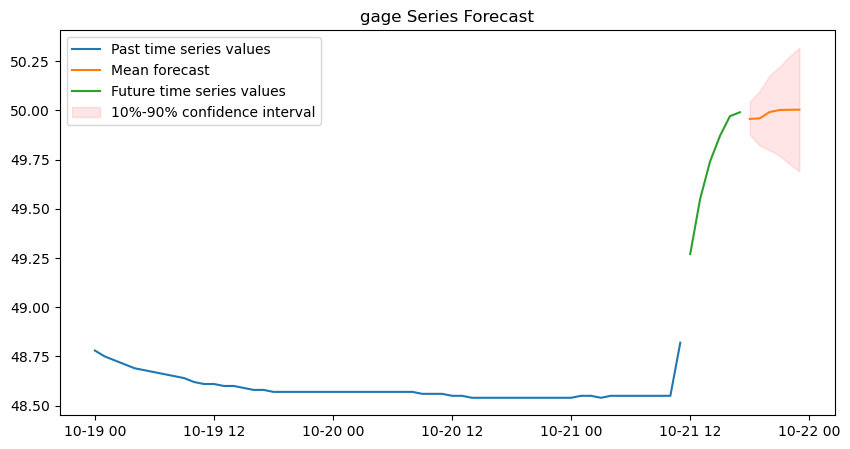

In [33]:
#test_data = predictions

item_id = 'gage'

plt.figure(figsize=(10, 5))
plt.title(item_id+' Series Forecast')

y_past = train_data.loc[item_id]["series"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["series"]

plt.plot(y_past[-60:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test[-prediction_length:], label="Future time series values")

plt.fill_between(y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval")
plt.legend(loc = 'upper left');
plt.savefig(item_id+'_forecast_'+str(prediction_length)+'.png')

In [34]:
y_pred[['mean', '0.1', '0.9']]

,mean,0.1,0.9
timestamp,,,
2024-10-21 18:00:00,49.956227,49.875999,50.043769
2024-10-21 19:00:00,49.959159,49.821026,50.098124
2024-10-21 20:00:00,49.991210,49.797020,50.178114
2024-10-21 21:00:00,50.001487,49.769244,50.221072
2024-10-21 22:00:00,50.002537,49.728207,50.273943
2024-10-21 23:00:00,50.003422,49.689701,50.317569


In [35]:
predictions.info()

<class 'autogluon.timeseries.dataset.ts_dataframe.TimeSeriesDataFrame'>
MultiIndex: 12 entries, ('gage', Timestamp('2024-10-21 18:00:00')) to ('flow', Timestamp('2024-10-21 23:00:00'))
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean    12 non-null     float64
 1   0.1     12 non-null     float64
 2   0.2     12 non-null     float64
 3   0.3     12 non-null     float64
 4   0.4     12 non-null     float64
 5   0.5     12 non-null     float64
 6   0.6     12 non-null     float64
 7   0.7     12 non-null     float64
 8   0.8     12 non-null     float64
 9   0.9     12 non-null     float64
dtypes: float64(10)
memory usage: 1.4+ KB
